<a href="https://colab.research.google.com/github/rsadaphule/transformers/blob/main/prompt_to_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate mask from the text prompt

ERROR: Could not find a version that satisfies the requirement LANGSAM (from versions: none)
ERROR: No matching distribution found for LANGSAM


In [11]:
!pip install torch torchvision
!pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

  Cloning https://github.com/luca-medeiros/lang-segment-anything.git to /tmp/pip-req-build-0qdb2sxh
  Running command git clone --filter=blob:none --quiet https://github.com/luca-medeiros/lang-segment-anything.git /tmp/pip-req-build-0qdb2sxh
  Resolved https://github.com/luca-medeiros/lang-segment-anything.git to commit 134a48a81ebd691686187ecce2d016fb327a8852
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-install-d11_xzdf/groundingdino_4ecfcbc862a749fc8841929047b45d0c
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-install-d11_xzdf/groundingdino_4ecfcbc862a749fc8841929047b45d0c
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 2b62f419c292ca9c518daae55512fabc3fead4a4
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fac

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
from lang_sam import LangSAM


In [9]:
image = "https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/mushroom-growing-in-forest-laszlo-podor.jpg"
# image = "./image.jpg"
text_prompt = "mushroom"

# New Section

In [3]:
def download_image(url):
    response = requests.get(url)
    response.raise_for_status()
    return Image.open(BytesIO(response.content)).convert("RGB")

def save_mask(mask_np, filename):
    mask_image = Image.fromarray((mask_np * 255).astype(np.uint8))
    mask_image.save(filename)

def display_image_with_masks(image, masks):
    num_masks = len(masks)

    fig, axes = plt.subplots(1, num_masks + 1, figsize=(15, 5))
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    for i, mask_np in enumerate(masks):
        axes[i+1].imshow(mask_np, cmap='gray')
        axes[i+1].set_title(f"Mask {i+1}")
        axes[i+1].axis('off')

    plt.tight_layout()
    plt.show()

def display_image_with_boxes(image, boxes, logits):
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.set_title("Image with Bounding Boxes")
    ax.axis('off')

    for box, logit in zip(boxes, logits):
        x_min, y_min, x_max, y_max = box
        confidence_score = round(logit.item(), 2)  # Convert logit to a scalar before rounding
        box_width = x_max - x_min
        box_height = y_max - y_min

        # Draw bounding box
        rect = plt.Rectangle((x_min, y_min), box_width, box_height, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

        # Add confidence score as text
        ax.text(x_min, y_min, f"Confidence: {confidence_score}", fontsize=8, color='red', verticalalignment='top')

    plt.show()

def print_bounding_boxes(boxes):
    print("Bounding Boxes:")
    for i, box in enumerate(boxes):
        print(f"Box {i+1}: {box}")

def print_detected_phrases(phrases):
    print("\nDetected Phrases:")
    for i, phrase in enumerate(phrases):
        print(f"Phrase {i+1}: {phrase}")

def print_logits(logits):
    print("\nConfidence:")
    for i, logit in enumerate(logits):
        print(f"Logit {i+1}: {logit}")

final text_encoder_type: bert-base-uncased
Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


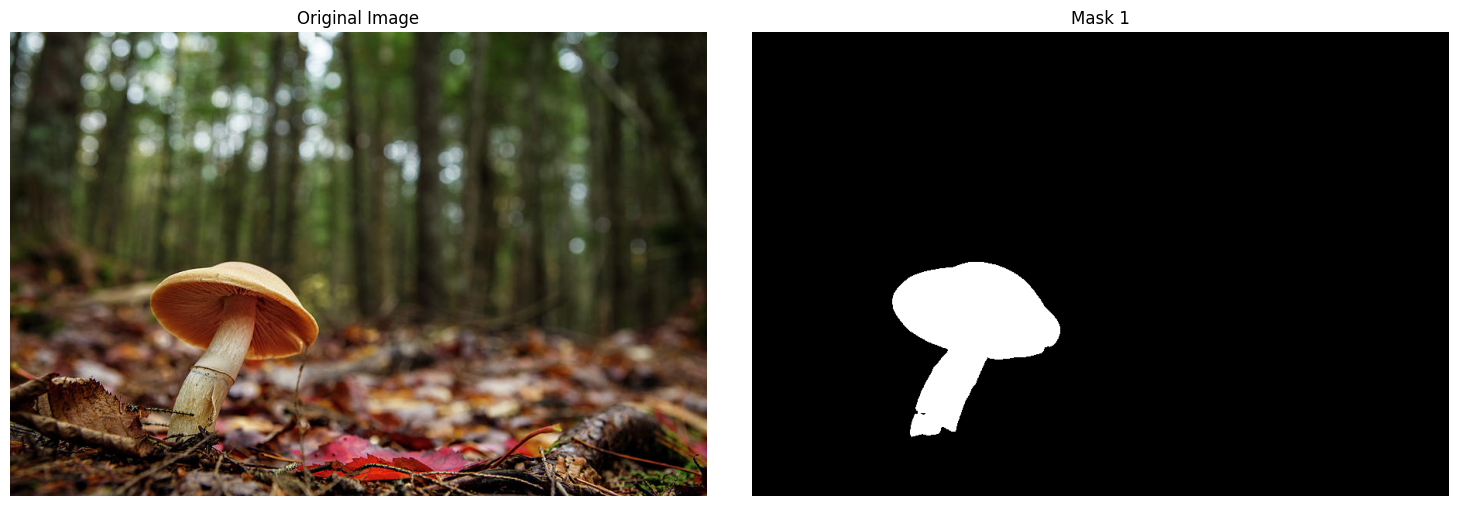

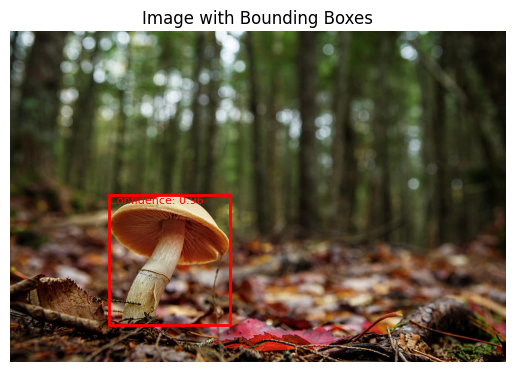

Bounding Boxes:
Box 1: tensor([178.9740, 295.6508, 398.6461, 531.6753])

Detected Phrases:
Phrase 1: mushroom

Confidence:
Logit 1: 0.95556640625


In [10]:
if image.startswith("http"):
   image_pil = download_image(image)
else:
    image_pil = Image.open(image).convert("RGB")

model = LangSAM()
masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

if len(masks) == 0:
     print(f"No objects of the '{text_prompt}' prompt detected in the image.")
else:
     # Convert masks to numpy arrays
  masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

  # Display the original image and masks side by side
  display_image_with_masks(image_pil, masks_np)

  # Display the image with bounding boxes and confidence scores
  display_image_with_boxes(image_pil, boxes, logits)

  # Save the masks
  for i, mask_np in enumerate(masks_np):
     mask_path = f"image_mask_{i+1}.png"
     save_mask(mask_np, mask_path)

     # Print the bounding boxes, phrases, and logits
     print_bounding_boxes(boxes)
     print_detected_phrases(phrases)
     print_logits(logits)